In [1]:
#!conda install -c conda-forge spotipy

In [2]:
import pandas as pd

In [3]:
# FILL IN THESE VALUES WITH YOUR OWN KEYS
client_id = "dd63cfab52f6408fb0f8b273e9b1c166"
client_secret = "117523fc551d4521adcc2bad24a24c3d"

# Make sure to add this on "Edit Settings" in your Dashboard
redirect_uri = "http://localhost:9000"

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Connect with API Keys created earlier
#scope = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                              client_secret=client_secret,
                                              redirect_uri=redirect_uri))


In [5]:
#--------------------------------------------------------

In [6]:
TOP50_playlist = sp.playlist('37i9dQZEVXbMMy2roB9myp')

In [7]:
list_tracksids = list()

for track_data in TOP50_playlist['tracks']['items']:
    
    #Gets just the ID (last part of the url)
    track_id = track_data['track']['uri'].split(':')[-1]
    track_name = track_data['track']['name']
    track_popularity = track_data['track']['popularity']
    list_tracksids.append((track_name,track_id,track_popularity))
    
list_tracksids[:5] #Sample

[('Shakira: Bzrp Music Sessions, Vol. 53', '4nrPB8O7Y7wsOCJdgXkthe', 98),
 ('Ya No Vuelvas (Versión Cuarteto)', '6jRZ33ifS5VOTMwmPxhPhN', 82),
 ('Muñecas', '1PAvhqefivTNdxZ4u8RT1d', 79),
 ('PUNTO G', '4WiQA1AGWHFvaxBU6bHghs', 36),
 ('Marisola - Remix', '0NO2zL0kw8sGGnaMvHKAZF', 89)]

In [8]:
df_features = pd.DataFrame()

for idx, dict_trackfeatures in enumerate(sp.audio_features(tracks=[url[1] for url in list_tracksids])):
    dict_trackfeatures['track_name'] = list_tracksids[idx][0]
    dict_trackfeatures['popularity'] = list_tracksids[idx][2]
    df_features = pd.concat([df_features,pd.Series(dict_trackfeatures)], axis=1)

                      #Selects only useful features
df_features=df_features.transpose()[['track_name','popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo']]

#Display Top 5 songs
df_features.head()

,track_name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
0,"Shakira: Bzrp Music Sessions, Vol. 53",98,0.778,0.632,-5.6,0.0493,0.274,0,0.0915,122.104
0,Ya No Vuelvas (Versión Cuarteto),82,0.736,0.9,-4.575,0.0825,0.224,0,0.375,149.947
0,Muñecas,79,0.681,0.711,-4.79,0.0846,0.0278,0,0.312,89.89
0,PUNTO G,36,0.751,0.761,-4.113,0.15,0.251,0.000238,0.0991,92.032
0,Marisola - Remix,89,0.765,0.872,-5.863,0.0498,0.173,0.000006,0.0749,94.999


In [9]:
#Handles data types
df_features[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo']]=df_features[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo']].astype(float)

In [10]:
#Some stats of our data

df_features.loc[:, df_features.columns != 'track_name'].describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.73872,0.65282,-5.731340,0.113634,0.228524,0.016505,0.173576,113.771660
std,0.12999,0.13205,2.033121,0.079722,0.196076,0.095939,0.136989,28.958046
min,0.40600,0.23400,-14.520000,0.036400,0.003020,0.000000,0.032200,79.928000
25%,0.64950,0.56825,-6.509000,0.051075,0.080550,0.000000,0.083025,92.025250
50%,0.74850,0.68000,-5.574000,0.079700,0.170500,0.000000,0.111500,98.013000
75%,0.86250,0.73050,-4.387500,0.165750,0.292000,0.000014,0.237250,131.482250
max,0.93300,0.90000,-2.248000,0.317000,0.803000,0.670000,0.721000,179.946000


### We're ready. Let's analyze the data!

Let's plot some histograms for getting the first patterns about the most popular music.

From the graph on the left, we can see that the music that makes up our TOP 50 playlist is mostly located in the second half (over 0.5 of 1), which appaerently means that it seems to be very danceable. How can we know if this suspicion is true?

Let's compare the average danceability of these songs with classical music. **Hello Mozart!**

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


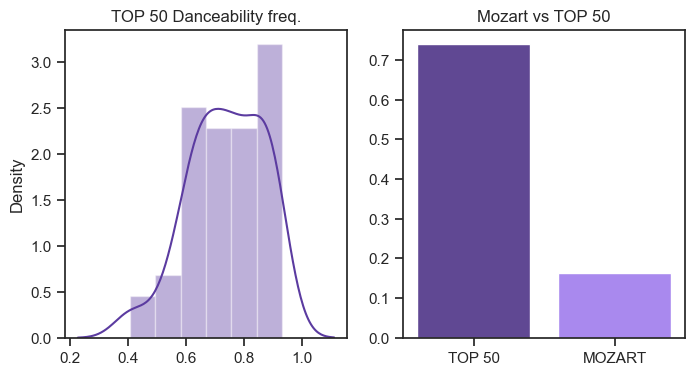

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's plot some histograms for getting the first patterns about the most popular music

sns.set_theme(context='notebook',style="ticks")
fig, axes = plt.subplots(1, 2, figsize=(8,4))

# Left - Danceability's histogram
sns.distplot(ax=axes[0], x=df_features["danceability"], bins=6,kde=True, color="#5B3BA0")
axes[0].set_title('TOP 50 Danceability freq.')

# Right - Comparation between the playlist avarage and Mozart's most popular song

                                              # Requiem, K. 626: Lacrimosa
mozart_danceability = sp.audio_features(tracks=['3oHSL6pt9LpNrQZuQGu9wL'])[0]['danceability']

avg_top50_danceability = df_features['danceability'].mean()

sns.barplot(ax= axes[1],
            x = 'who',
            y = 'Danceability',
            data = {'who':['TOP 50','MOZART'],'Danceability':[avg_top50_danceability, mozart_danceability]},
            palette=['#5B3BA0','#A378FF']
            )
 
axes[1].set_title('Mozart vs TOP 50')

plt.show()


#### Amazing results!
As we can imagine, Mozart is not in the Top 50 most played songs. Based on our brief analysis, Mozart might not have enough danceability to be part of the playlist.

- Mozart's danceability: 0.162
- TOP 50 danceability avarage: 0.739

The difference is huge. However, it could just be a fluke! Let's look at the rest of the variables that make up modern music, from the TOP 50, and compare them with our Austrian friend.

In [12]:
list(df_features.keys())

['track_name',
 'popularity',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'tempo']

In [13]:
#Adds Mozart's song variables to our dataframe
mozart = pd.DataFrame({'track_name':['Mozart'], 'popularity':[0.0]})
for k,v in sp.audio_features(tracks=['3oHSL6pt9LpNrQZuQGu9wL'])[0].items():
    if k in df_features.keys():
        mozart[k]=v

df_features = pd.concat([df_features,mozart], axis=0)
df_features['playlist'] = ['TOP 50' if x != 'Mozart' else 'Mozart' for x in df_features['track_name']] 
                           
df_features.tail(1)

,track_name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,playlist
0,Mozart,0.0,0.162,0.0898,-23.269,0.0354,0.944,0.917,0.187,132.047,Mozart


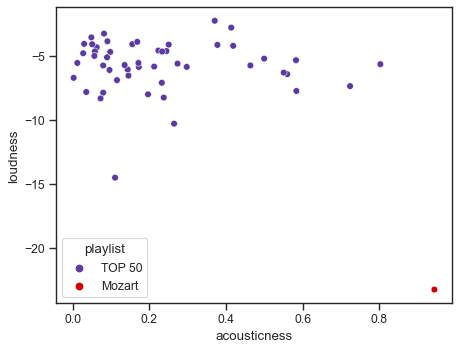

In [14]:
plt.figure(dpi=80)

sns.scatterplot(
    data=df_features, x='acousticness',y='loudness', hue="playlist",
    sizes=(20, 200), legend="full", palette=['#5B3BA0','#D00000']
)

plt.show()

### FYI: Mozart is no longer in trendy.
This chart partly helps to understand why Mozart is not trendy. The songs in the Top 50 have similar values of the variables "loudness" and "acousticness" and are highly concentrated in the upper left part of the graph. The trend is clear: high loudness and low acousticness levels.
On the other hand, Mozart goes against the trend!

### Same steps, another playlist
What if, instead of Mozart and trendy songs, we take a playlist with the best songs of the 80s?

*Let's do the same, but slightly different.*

In [15]:
AllOut80s = sp.playlist('37i9dQZF1DX4UtSsGT1Sbe')
list_tracksids = list()

for track_data in AllOut80s['tracks']['items']:
    
    #Gets just the ID (last part of the url)
    track_id = track_data['track']['uri'].split(':')[-1]
    track_name = track_data['track']['name']
    track_popularity = track_data['track']['popularity']
    list_tracksids.append((track_name,track_id,track_popularity))

AllOut80s_features = pd.DataFrame()

for idx, dict_trackfeatures in enumerate(sp.audio_features(tracks=[url[1] for url in list_tracksids])):
    dict_trackfeatures['track_name'] = list_tracksids[idx][0]
    dict_trackfeatures['popularity'] = list_tracksids[idx][2]
    AllOut80s_features = pd.concat([AllOut80s_features,pd.Series(dict_trackfeatures)], axis=1)



                           #Selects only useful features
AllOut80s_features=AllOut80s_features.transpose()[['track_name','popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo']]
AllOut80s_features['playlist'] = 'AllOut80s'

In [16]:
#Handles data types
AllOut80s_features[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo']]=AllOut80s_features[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo']].astype(float)

### 80s vs Trendy Top 50

<Figure size 512x384 with 0 Axes>

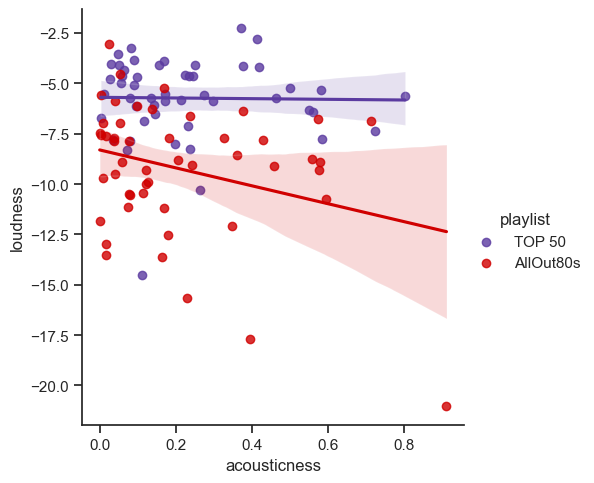

In [17]:
# Setting up concatenated df
df_allsongs = pd.concat([df_features, AllOut80s_features[:50]]).reset_index()

df_allsongs= df_allsongs.drop(df_allsongs.index[df_allsongs['playlist'] == 'Mozart'])

plt.figure(dpi=80)


sns.lmplot(
    data=df_allsongs, x='acousticness',y='loudness', hue="playlist",
    legend="full", palette=['#5B3BA0','#D00000']
)

plt.show()

### Loudness / Acousticness
Looking at the distributions and regression lines for each playlist, we notice that the trends are quite different. Although the relationship between variables (slope of the curves) remains similar, the songs seem to be positioned in a pattern, with the Top 50 playlist having a higher level of "loudness".

With these two variables alone we can see that the music of the 80s is more similar to current trends than Mozart.

## Let's take the project a step further!
**Can we predict, considering all possible variables, to which playlist a song belongs?**
*Not sure, but the answer is probably **KNeighbors**.*

I googled the most representative song for the 80s to use it as input of our modeling prediction:

										
                                        **‘Purple Rain’ by Prince**
                                        

Here's the spotify link: https://open.spotify.com/track/54X78diSLoUDI3joC2bjMz?si=ff961120b260427c

In [29]:
#Features used for modeling
featlist=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','tempo']

prince = {}
for k,v in sp.audio_features(tracks=['54X78diSLoUDI3joC2bjMz'])[0].items():
    if k in featlist:
        prince[k]=v

prince = pd.DataFrame(prince.items()).transpose()
prince.columns = prince.iloc[0]
prince=prince[1:]
prince[featlist] = prince[featlist].astype(float)
prince


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo
1,0.367,0.452,-10.422,0.0307,0.0353,0.00228,0.689,113.066


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

X = df_allsongs[featlist]

y = df_allsongs['playlist']

knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [35]:
# Truth time! The prediction is...

prediction = knn.predict(prince)
print('The song could be included in the playlist: ', prediction[0])

The song could be included in the playlist:  AllOut80s


C:\Users\ivanr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Thanks for reading!